In [38]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/')

df_nifty=pd.read_csv('01.RawData/NiftyHistorical.csv',dtype=str)
df_nifty['Date']=pd.to_datetime(df_nifty['Date'], format='%Y-%m-%d')
df_nifty.index=df_nifty['Date']

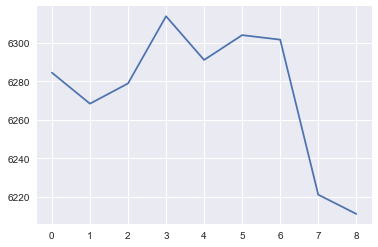

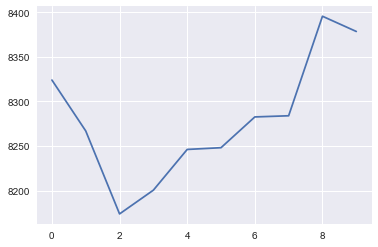

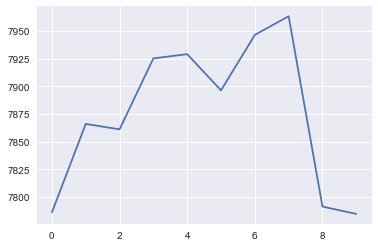

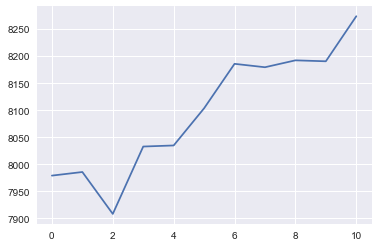

In [44]:
x_1=df_nifty.loc[datetime(2013,12,22):datetime(2014,1,5),'Close'].values
x_2=df_nifty.loc[datetime(2014,12,22):datetime(2015,1,5),'Close'].values
x_3=df_nifty.loc[datetime(2015,12,22):datetime(2016,1,5),'Close'].values
x_4=df_nifty.loc[datetime(2016,12,22):datetime(2017,1,5),'Close'].values

for data in [x_1,x_2,x_3,x_4]:
    plt.figure()
    plt.plot(data)


In [1]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/03.HistoricalData/1.OpenInterest')
%run scrape_clientwise_open_interest.py
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/03.HistoricalData/3.BhavCopy')
%run scrape_bhav_copy.py



In [53]:
os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/03.HistoricalData/3.BhavCopy')

import glob

df_eq=pd.concat([pd.read_csv(x) for x in glob.glob('2.EQ/*') if len(open(x,'rb').readlines())>1])
df_eq['TIMESTAMP']=pd.to_datetime(df_eq['TIMESTAMP'].str.title(),format='%d-%b-%Y')
df_eq=df_eq.sort_values(by=['SYMBOL','TIMESTAMP'])
df_eq=df_eq[df_eq['SERIES']=='EQ']
df_eq.set_index(['SYMBOL','TIMESTAMP'],inplace=True)
df_eq['CLOSE'].unstack().to_csv('04.EQMaster.csv')

In [66]:
nifty50_stocks=['ADANIPORTS','AMBUJACEM','ASIANPAINT','AUROPHARMA','AXISBANK','BAJAJ-AUTO','BAJFINANCE',\
                'BHARTIARTL','BOSCHLTD','BPCL','CIPLA','COALINDIA','DRREDDY','EICHERMOT','GAIL','HCLTECH',\
                'HDFC','HDFCBANK','HEROMOTOCO','HINDALCO','HINDPETRO','HINDUNILVR','IBULHSGFIN','ICICIBANK',\
                'INDUSINDBK','INFRATEL','INFY','IOC','ITC','KOTAKBANK','LT','LUPIN','M&M','MARUTI','NTPC',\
                'ONGC','POWERGRID','RELIANCE','SBIN','SUNPHARMA','TATAMOTORS','TATASTEEL','TCS','TECHM',\
                'ULTRACEMCO','UPL','VEDL','WIPRO','YESBANK','ZEEL']

nifty50_ts=df_eq['CLOSE'].unstack().loc[nifty50_stocks,:]
nifty50_ret=100.0*(nifty50_ts.iloc[:,1:].values/nifty50_ts.iloc[:,:-1].values-1)
nifty50_ret=pd.DataFrame(nifty50_ret,index=nifty50_stocks,columns=nifty50_ts.columns[1:])
nifty50_ranks=nifty50_ret.copy()
for col in nifty50_ret:
    nifty50_ranks[col]=nifty50_ranks[col].rank(ascending=False)
nifty50_ts['TYPE']='CLOSE'
nifty50_ret['TYPE']='RETURNS'
nifty50_ranks['TYPE']='RANK'
nifty50_ts.set_index('TYPE',append=True,inplace=True)
nifty50_ret.set_index('TYPE',append=True,inplace=True)
nifty50_ranks.set_index('TYPE',append=True,inplace=True)
pd.concat([nifty50_ts,nifty50_ret,nifty50_ranks]).to_csv('05.Nifty50TS.csv')

TIMESTAMP,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,2017-01-11 00:00:00,2017-01-12 00:00:00,2017-01-13 00:00:00,...,2018-02-16 00:00:00,2018-02-19 00:00:00,2018-02-20 00:00:00,2018-02-21 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-02-26 00:00:00,2018-02-27 00:00:00,2018-02-28 00:00:00,2018-03-01 00:00:00
SYMBOL,,,,,,,,,,,,,,,,,,,,,
20MICRONS,33.85,33.95,34.70,35.55,34.45,33.70,34.30,37.25,36.15,36.25,...,52.15,50.25,51.00,50.35,50.25,51.85,50.85,50.60,50.50,50.15
3IINFOTECH,5.60,5.60,5.60,5.75,5.75,6.00,6.05,6.15,6.25,6.25,...,5.60,5.70,5.70,5.70,5.55,5.80,5.85,5.70,5.85,5.85
3MINDIA,11056.45,10917.20,10808.45,11097.40,11305.00,11503.75,11678.35,12511.40,12579.00,12465.85,...,19922.35,20218.60,20497.95,20543.45,20725.25,20733.80,20691.65,20564.80,20717.40,21012.80
5PAISA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,341.30,332.20,333.95,350.60,368.10,370.60,370.50,357.55,349.85,NaN
63MOONS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.00,95.60,94.75,93.75,93.85,94.05,95.20,93.35,93.35,92.95
8KMILES,674.20,707.80,709.40,714.65,710.25,686.20,681.85,679.05,673.75,667.55,...,809.90,799.25,776.80,766.90,758.70,753.45,750.95,744.25,736.55,730.85
A2ZINFRA,42.15,45.65,45.35,46.45,44.65,45.10,44.85,44.85,43.55,43.20,...,32.75,33.30,33.45,33.10,33.00,33.80,34.70,35.00,35.00,35.15
AARTIDRUGS,611.95,615.10,616.00,625.20,625.65,615.45,620.05,620.30,623.00,620.05,...,648.80,624.05,629.05,607.70,607.00,613.15,609.15,603.70,600.40,607.85
AARTIIND,695.25,703.40,698.00,701.35,699.75,698.95,697.85,701.15,699.55,702.40,...,1169.00,1155.90,1169.95,1167.25,1155.10,1170.40,1144.85,1156.30,1173.05,1172.25


In [40]:
df_eq.groupby(df_eq.index)['CLOSE'].count().sort_values(ascending=False)

(IDFCBANK, 2017-04-26 00:00:00)     15
(IRFC, 2017-04-03 00:00:00)         15
(IDFCBANK, 2017-08-28 00:00:00)     15
(IDFCBANK, 2017-09-12 00:00:00)     15
(IDFCBANK, 2017-08-02 00:00:00)     15
(IDFCBANK, 2018-01-31 00:00:00)     15
(IDFCBANK, 2017-11-09 00:00:00)     15
(IDFCBANK, 2017-07-04 00:00:00)     14
(IDFCBANK, 2018-01-18 00:00:00)     14
(IDFCBANK, 2017-08-23 00:00:00)     14
(IDFCBANK, 2018-01-19 00:00:00)     14
(IDFCBANK, 2017-06-27 00:00:00)     14
(IDFCBANK, 2017-04-18 00:00:00)     14
(IDFCBANK, 2017-10-05 00:00:00)     14
(IRFC, 2017-07-04 00:00:00)         14
(IDFCBANK, 2017-08-22 00:00:00)     14
(IDFCBANK, 2017-07-17 00:00:00)     14
(IDFCBANK, 2017-04-17 00:00:00)     14
(IDFCBANK, 2017-04-05 00:00:00)     14
(IDFCBANK, 2017-11-15 00:00:00)     14
(IDFCBANK, 2017-09-26 00:00:00)     14
(IDFCBANK, 2017-04-07 00:00:00)     14
(IDFCBANK, 2017-06-08 00:00:00)     14
(IDFCBANK, 2017-07-18 00:00:00)     14
(IDFCBANK, 2017-06-21 00:00:00)     14
(IDFCBANK, 2017-04-24 00:

In [27]:
all_eq['TIMESTAMP'].str.title().head()

0    01-Aug-2017
1    01-Aug-2017
2    01-Aug-2017
3    01-Aug-2017
4    01-Aug-2017
Name: TIMESTAMP, dtype: object

UnsortedIndexError: 'MultiIndex Slicing requires the index to be fully lexsorted tuple len (2), lexsort depth (0)'

In [25]:
import datetime
now = datetime.datetime.now()
print now.strftime("%d-%b")

'04-MAR-2017'.title()

04-Mar


'04-Mar-2017'

In [68]:
import pandas as pd
import sys, os

os.chdir('C:/Users/arpit.goel/Documents/Projects/Kaggle/16.NiftyOptions/03.HistoricalData/3.BhavCopy')
bhav_fo=pd.read_csv('1.FO/fo23FEB2018bhav.csv')
bhav_fo['EXPIRY_DT']=pd.to_datetime(bhav_fo['EXPIRY_DT'],format='%d-%b-%Y')
bhav_fo=bhav_fo[bhav_fo['STRIKE_PR']>0]
next_expiry_dates=bhav_fo.groupby(['SYMBOL'])['EXPIRY_DT'].min()
bhav_fo=bhav_fo[bhav_fo['EXPIRY_DT']==bhav_fo['SYMBOL'].map(next_expiry_dates)]


In [108]:
sample=bhav_fo
# sample=bhav_fo[bhav_fo['SYMBOL'].isin(['TATASTEEL'])]
output=[]

for name,group in sample.groupby(['SYMBOL']):
    contracts=group.groupby('STRIKE_PR')['CONTRACTS'].sum()
    contracts=contracts.cumsum()/contracts.sum()
    contracts=contracts[(contracts>0.05) &(contracts<0.95)]
    contracts=group[group['STRIKE_PR'].isin(contracts.index)].set_index(['STRIKE_PR','OPTION_TYP'])
    contracts=contracts[['OPEN','CLOSE','OPEN_INT','CHG_IN_OI']].unstack()
    if contracts.shape[1]<8:
        continue
    contracts.columns=contracts.columns.get_level_values(0)+'_'+contracts.columns.get_level_values(1)
    contracts['ITM_CE']=np.logical_or(contracts['OPEN_PE']<contracts['OPEN_CE'],contracts['CLOSE_PE']<contracts['CLOSE_CE']).astype(np.int64)
    contracts['ITM_PE']=np.logical_or(contracts['OPEN_PE']>contracts['OPEN_CE'],contracts['CLOSE_PE']>contracts['CLOSE_CE']).astype(np.int64)
    contracts['OPEN_INT_ITM_CE']=contracts['OPEN_INT_CE']*contracts['ITM_CE']
    contracts['OPEN_INT_ITM_PE']=contracts['OPEN_INT_PE']*contracts['ITM_PE']
    contracts['CHG_IN_OI_ITM_CE']=contracts['CHG_IN_OI_CE']*contracts['ITM_CE']
    contracts['CHG_IN_OI_ITM_PE']=contracts['CHG_IN_OI_PE']*contracts['ITM_PE']
    summary=contracts[['OPEN_INT_CE','OPEN_INT_PE','OPEN_INT_ITM_CE','OPEN_INT_ITM_PE','CHG_IN_OI_CE','CHG_IN_OI_PE','CHG_IN_OI_ITM_CE','CHG_IN_OI_ITM_PE']].sum()
    summary['SYMBOL']=name
    output.append(summary)
pd.concat(output,axis=1).T.set_index('SYMBOL').to_csv('Summary1.csv')
contracts

,OPEN_CE,OPEN_PE,CLOSE_CE,CLOSE_PE,OPEN_INT_CE,OPEN_INT_PE,CHG_IN_OI_CE,CHG_IN_OI_PE,ITM_CE,ITM_PE,OPEN_INT_ITM_CE,OPEN_INT_ITM_PE,CHG_IN_OI_ITM_CE,CHG_IN_OI_ITM_PE
STRIKE_PR,,,,,,,,,,,,,,
540.0,0.0,4.55,33.00,4.95,1300,35100,0,10400,1,1,1300,35100,0,10400
550.0,0.0,7.30,53.00,7.10,0,104000,0,9100,1,1,0,104000,0,9100
560.0,20.8,10.55,21.75,10.50,5200,29900,1300,22100,1,0,5200,0,1300,0
570.0,14.4,14.50,17.65,14.55,19500,19500,1300,6500,1,1,19500,19500,1300,6500
580.0,10.5,20.25,13.15,20.20,135200,13000,76700,1300,0,1,0,13000,0,1300
590.0,7.0,0.00,9.55,22.85,10400,0,2600,0,1,1,10400,0,2600,0
